In [1]:
import numpy as np

# Arithmetic Operations (allowing for uncertainty)

## Definitions

In [240]:
significant_figures = 4
_float_tolerance = 5 * (10 ** -(significant_figures +1))

def _do_float_division_with_tolerance(divisor, dividend,):
    if _do_float_eq_with_tolerance(divisor, dividend):
        return int(1)
    
    quotient = np.true_divide(divisor, dividend)
    return quotient

def _do_float_subtraction_with_tolerance(minuend, subtrahend,):
    difference = np.subtract(minuend, subtrahend)

    if _do_float_le_with_tolerance(difference + _float_tolerance, int(difference)) and _do_float_ge_with_tolerance(difference - _float_tolerance, int(difference)):
        return int(difference)

    return difference

vectorized_float_division_with_tolerance = np.vectorize(_do_float_division_with_tolerance)
vectorized_float_subtraction_with_tolerance = np.vectorize(_do_float_subtraction_with_tolerance)

def _do_float_eq_with_tolerance(given, to_compare, tolerance=_float_tolerance, sig_figs=significant_figures):
    return round(given - tolerance, sig_figs) <= to_compare and round(given + tolerance, sig_figs) >= to_compare

def _do_float_gt_with_tolerance(given, to_compare, tolerance=_float_tolerance, sig_figs=significant_figures):
    return round(given - tolerance, sig_figs) > to_compare and round(given + tolerance, sig_figs) > to_compare

def _do_float_lt_with_tolerance(given, to_compare, tolerance=_float_tolerance, sig_figs=significant_figures):
    return round(given - tolerance, sig_figs) < to_compare and round(given + tolerance, sig_figs) < to_compare

def _do_float_ge_with_tolerance(given, to_compare, tolerance=_float_tolerance, sig_figs=significant_figures):
    return _do_float_gt_with_tolerance(given, to_compare, tolerance, sig_figs) or _do_float_eq_with_tolerance(given, to_compare, tolerance, sig_figs)

def _do_float_le_with_tolerance(given, to_compare, tolerance=_float_tolerance, sig_figs=significant_figures):
    return _do_float_lt_with_tolerance(given, to_compare, tolerance, sig_figs) or _do_float_eq_with_tolerance(given, to_compare, tolerance, sig_figs)

vectorized_float_eq_with_tolerance = np.vectorize(_do_float_eq_with_tolerance)
vectorized_float_gt_with_tolerance = np.vectorize(_do_float_gt_with_tolerance)
vectorized_float_lt_with_tolerance = np.vectorize(_do_float_lt_with_tolerance)
vectorized_float_ge_with_tolerance = np.vectorize(_do_float_ge_with_tolerance)
vectorized_float_le_with_tolerance = np.vectorize(_do_float_le_with_tolerance)

## Unit Tests

In [3]:
import unittest

In [4]:
class FloatEqualityWithToleranceTest(unittest.TestCase):
    def test_float_equality_with_tolerance_returns_false_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.0001 + 0.0001, significant_figures +1)
        
        f1_minus_tolerance = (round(f1, significant_figures) - _float_tolerance)
        f1_plus_tolerance = (round(f1, significant_figures) + _float_tolerance)

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        #print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, False)
    
    def test_float_equality_with_tolerance_returns_false_f2_greater_than_f1(self):
        f1 = round(0.0001 + 0.0001, significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = (round(f1, significant_figures) - _float_tolerance)
        f1_plus_tolerance = (round(f1, significant_figures) + _float_tolerance)

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        #print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, False)

    def test_float_equality_with_tolerance_returns_true_f2_greater_than_f1(self):
        f1 = round(0.000125 + 0.000125, significant_figures + 1)
        f2 = round(2*(10**-significant_figures), significant_figures + 1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures)
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures) 

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, True)

    def test_float_equality_with_tolerance_returns_true_f1_greater_than_f2(self):
        f2 = round(0.000125 + 0.000125, significant_figures + 1)
        f1 = round(2*(10**-significant_figures), significant_figures + 1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures)
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures) 

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, True)

class FloatGreaterThanWithToleranceTest(unittest.TestCase):
    def test_float_greater_than_with_tolerance_returns_false_f1_less_than_f2(self):     
        f1 = round(0.0001 + 0.0001, significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, False)

    def test_float_greater_than_with_tolerance_returns_false_f1_near_f2(self):     
        f1 = round(0.000135 + 0.000135, significant_figures +1)
        f2 = round(3*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, False)

    def test_float_greater_than_with_tolerance_returns_true_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.000135 + 0.000135, significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, True)

class FloatLessThanWithToleranceTest(unittest.TestCase):
    def test_float_less_than_with_tolerance_returns_false_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.0001 + 0.0001, significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, False)

    def test_float_less_than_with_tolerance_returns_false_f1_near_f2(self):     
        f1 = round(0.000135 + 0.000135, significant_figures +1)
        f2 = round(3*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, False)

    def test_float_less_than_with_tolerance_returns_true_f1_less_than_f2(self):     
        f1 = round(1.35 * (10**-significant_figures) + 1.35 * (10**-significant_figures), significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, True)

class ArithmeticOperationsTest(unittest.TestCase):
    
    def test_float_division_with_tolerance_returns_unity(self):
        f1 = 0.0001 + 0.0001
        f2 = 2*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, int(1))
    
    def test_float_division_with_tolerance_returns_negative_unity(self):
        f1 = 0.0001 + 0.0001
        f2 = -2*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, int(-1))
    
    def test_float_division_with_tolerance_returns_float(self):
        f1 = 0.0001 + 0.0001
        f2 = 4*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, f1/f2)

unittest.main(argv=[''], verbosity=2, exit=False)

test_float_division_with_tolerance_returns_float (__main__.ArithmeticOperationsTest) ... ok
test_float_division_with_tolerance_returns_negative_unity (__main__.ArithmeticOperationsTest) ... ok
test_float_division_with_tolerance_returns_unity (__main__.ArithmeticOperationsTest) ... ok
test_float_equality_with_tolerance_returns_false_f1_greater_than_f2 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_false_f2_greater_than_f1 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_true_f1_greater_than_f2 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_true_f2_greater_than_f1 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_greater_than_with_tolerance_returns_false_f1_less_than_f2 (__main__.FloatGreaterThanWithToleranceTest) ... ok
test_float_greater_than_with_tolerance_returns_false_f1_near_f2 (__main__.FloatGreaterThanWithToleranceTest) ... ok
test_float_g

# Schwarzschild Helper Functions and Constants

## Constants

In [5]:
M = 1

## Functions

### Curvature

In [6]:
def get_curvature_factor(r_coordinate):

    if r_coordinate == 0:
        return np.inf

    schwarzschild_radius = 2*M
    r_coordinate_scaled_by_M = np.multiply(r_coordinate, M)

    quotient = vectorized_float_division_with_tolerance(divisor=schwarzschild_radius, dividend=r_coordinate_scaled_by_M)
    difference = vectorized_float_subtraction_with_tolerance(minuend=np.ones(np.shape(r_coordinate)), subtrahend=quotient)

    if difference > 0:
        return np.sqrt(difference)
    else:
        return -np.sqrt(np.abs(difference))

#### Unit Test

In [7]:
import unittest

In [8]:
#unittest.main(argv=[''], verbosity=2, exit=False)

### Energy

In [9]:
def get_energy_per_unit_mass_at_shell(r_coordinate):
    return np.sqrt(_do_float_subtraction_with_tolerance(1, _do_float_division_with_tolerance(2*M, r_coordinate)))

# The Lattice

In [10]:
from dataclasses import dataclass

### Dimensions dataclass

In [11]:
@dataclass(frozen=True)
class Dimensions:
    left: int
    right: int
    top: int
    bottom: int
    resolution: float

### Coordinate and Coordinate System helper dataclasses

#### Cartesian

In [12]:
@dataclass(frozen=True)
class Cartesian:
    x: int
    y: int

    def __eq__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_eq_with_tolerance(self.x, other.x)
            y_match = vectorized_float_eq_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_ge_with_tolerance(self.x, other.x)
            y_match = vectorized_float_ge_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_le_with_tolerance(self.x, other.x)
            y_match = vectorized_float_le_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    ## TODO: need to consider case where x == x, y > y
    def __gt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_gt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_gt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_lt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_lt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

#### Polar

In [13]:
@dataclass(frozen=True)
class Polar:
    r: int
    phi: float

    def __eq__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_eq_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_eq_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_ge_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_ge_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_le_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_le_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_gt_with_tolerance(self.phi, other.phi)

            r_match = vectorized_float_gt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_gt_with_tolerance(self.phi, other.phi)

            return r_match and phi_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_lt_with_tolerance(self.phi, other.phi) 

            r_match = vectorized_float_lt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_lt_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

#### Coordinates

In [14]:
class Coordinate:
    def __init__(self, q1: int, q2: int, is_cartesian=True,):
        if is_cartesian:
            self.cartesian = Cartesian(q1, q2)
            self.polar = Coordinate.convert_from_cartesian(self.cartesian)
        else:
            if _do_float_lt_with_tolerance(q2, 0):
                q2 = _do_float_subtraction_with_tolerance(q2, -2*np.pi)
            elif _do_float_gt_with_tolerance(q2, 2*np.pi):
                q2 = _do_float_subtraction_with_tolerance(q2, 2*np.pi)

            self.polar = Polar(q1, q2)
            self.cartesian = Coordinate.convert_from_polar(self.polar)
        self.curvature = get_curvature_factor(self.polar.r)
    
    def convert_from_polar(coordinates_to_convert: Polar):
        x_coordinate = np.multiply(coordinates_to_convert.r, np.cos(coordinates_to_convert.phi))
        y_coordinate = np.multiply(coordinates_to_convert.r, np.sin(coordinates_to_convert.phi))

        return Cartesian(x=x_coordinate, y=y_coordinate)

    def convert_from_cartesian(coordinates_to_convert: Cartesian):
        r_coordinate = np.sqrt(np.power(coordinates_to_convert.x , 2) + np.power(coordinates_to_convert.y , 2))

        if r_coordinate == 0:
            return Polar(r=r_coordinate, phi=0)
        
        phi_coordinate = np.arctan2(coordinates_to_convert.y, coordinates_to_convert.x)

        if _do_float_lt_with_tolerance(phi_coordinate, 0):
            phi_coordinate = _do_float_subtraction_with_tolerance(phi_coordinate, -2*np.pi)

        return Polar(r=r_coordinate, phi=phi_coordinate)
    
    def __eq__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian == other.cartesian and self.polar == other.polar
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian > other.cartesian and self.polar > other.polar
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian >= other.cartesian and self.polar >= other.polar
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian < other.cartesian and self.polar < other.polar
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian <= other.cartesian and self.polar <= other.polar
        else:
            return NotImplemented

### The Latticework Class

#### Creation

In [55]:
class Latticework:

    def __init__(self, dimensions: Dimensions):
        self.dimensions = dimensions
        self._build_grid()
        self._build_dictionary_of_shells()
    
    def _build_grid(self):
        self.vertices = { }
        for x in np.arange(start=self.dimensions.left, stop=self.dimensions.right + 1, step= self.dimensions.resolution):
            for y in np.arange(start=self.dimensions.bottom, stop=self.dimensions.top + 1, step= self.dimensions.resolution):
                self.vertices.update({(x, y) : Coordinate(q1=x, q2=y)})
    
    def get_coordinates_of_constant_r(self, constant_r, ascending=True, complete_loop=True) -> list():
        shell_of_constant_r = self.shells["r"][constant_r].copy()
        if not ascending:
            shell_of_constant_r.sort(reverse= not ascending, key=lambda x: x.polar.phi)
        if complete_loop:
            shell_of_constant_r.append(shell_of_constant_r[0])
        return shell_of_constant_r
    
    def get_coordinates_of_constant_phi(self, constant_phi, ascending=True) -> list():
        shell_of_constant_phi = self.shells["phi"][constant_phi].copy()
        if not ascending:
            shell_of_constant_phi.sort(reverse= not ascending, key=lambda x: x.polar.r)
        
        # if len(shell_of_constant_phi) > 1:
        #     origin = Coordinate(0, 0, is_cartesian=False)
        #     if origin not in shell_of_constant_phi:
        #         if not ascending:
        #             shell_of_constant_phi.append(origin)
        #         else:
        #             shell_of_constant_phi.insert(0, origin)
        return shell_of_constant_phi

    def _build_dictionary_of_shells(self):
        self.shells = { 
            "r" : { }, 
            "phi" : { }, 
            }

        sorted_vertices = list(self.vertices.values())
        sorted_vertices.sort(key=lambda x: x.polar.r)

        for coordinate in sorted_vertices:
            if coordinate.polar.r not in self.shells["r"].keys():
                self.shells["r"].update({coordinate.polar.r : [ coordinate, ]})
            else:
                self.shells["r"][coordinate.polar.r].append(coordinate)
        
        sorted_vertices.sort(key=lambda x: x.polar.phi)
        for coordinate in sorted_vertices:
            if coordinate.polar.phi not in self.shells["phi"].keys():
                self.shells["phi"].update({coordinate.polar.phi : [ coordinate, ]})
            else:
                self.shells["phi"][coordinate.polar.phi].append(coordinate)
            
        for r in self.shells["r"].keys():
            self.shells["r"][r].sort(key=lambda x: x.polar.phi)
        
        for phi in self.shells["phi"].keys():
            self.shells["phi"][phi].sort(key=lambda x: x.polar.r)
    
    def get_coordinate_at_edge(self):
        return self.shells["r"][self.dimensions.right][0]

#### Visualization of the Lattice

In [16]:
import matplotlib.pyplot as plt

def draw_layout(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot()
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
        rings.append((np.asarray(xs), np.asarray(ys)))

    for ring in rings:
        ax.plot(ring[0], ring[1], c='C1')

    for vertices, coordinate in lattice.vertices.items():
        ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, c='C0')

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    return fig, ax

def draw_layout_3D(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
            if (coordinate.polar.r <= 2.0):
                zs.append(0)
            else:
                zs.append(np.true_divide(1, coordinate.curvature))
            # if (coordinate.polar.r > 2):
            #     zs.append(np.true_divide(1, coordinate.curvature))
            # else:
            #     zs.append(0)
        rings.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    for ring in rings:
        if (ring[2].any() == 0):
            ax.plot(ring[0], ring[1], 4, c='C3')
        else:
            ax.plot(ring[0], ring[1], ring[2], c='C1')

    curves = [ ]
    for phi in lattice.shells["phi"].keys():
        coordinates_with_phi = lattice.get_coordinates_of_constant_phi(phi)
        
        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_phi:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
            if (coordinate.polar.r > 2.0):
                zs.append(np.true_divide(1, coordinate.curvature))
            else:
                zs.append(4)
        curves.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    for curve in curves:
        ax.plot(curve[0], curve[1], curve[2], c='C2')

    for vertices, coordinate in lattice.vertices.items():
        if coordinate.polar.r <= 2.0:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, 4, c='C3')
        else:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, np.true_divide(1, coordinate.curvature), c='C0')
            

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=1, top=4.1,)

    return fig, ax

In [17]:
lattice_dimensions = Dimensions(left=-5, right=5, top=5, bottom=-5, resolution=1)
empty_lattice = Latticework(dimensions=lattice_dimensions)

maximum_curvature = 0
smallest_r_outside_horizon = 3
coord_of_r = None
for r in empty_lattice.shells["r"].keys():
    if r < smallest_r_outside_horizon and r > 2.0:
        smallest_r_outside_horizon = r
        coord_of_r = empty_lattice.shells["r"][smallest_r_outside_horizon][0]
print(np.true_divide(1, empty_lattice.vertices[(coord_of_r.cartesian.x, coord_of_r.cartesian.y)].curvature))

3.077683537175253


##### 2D View

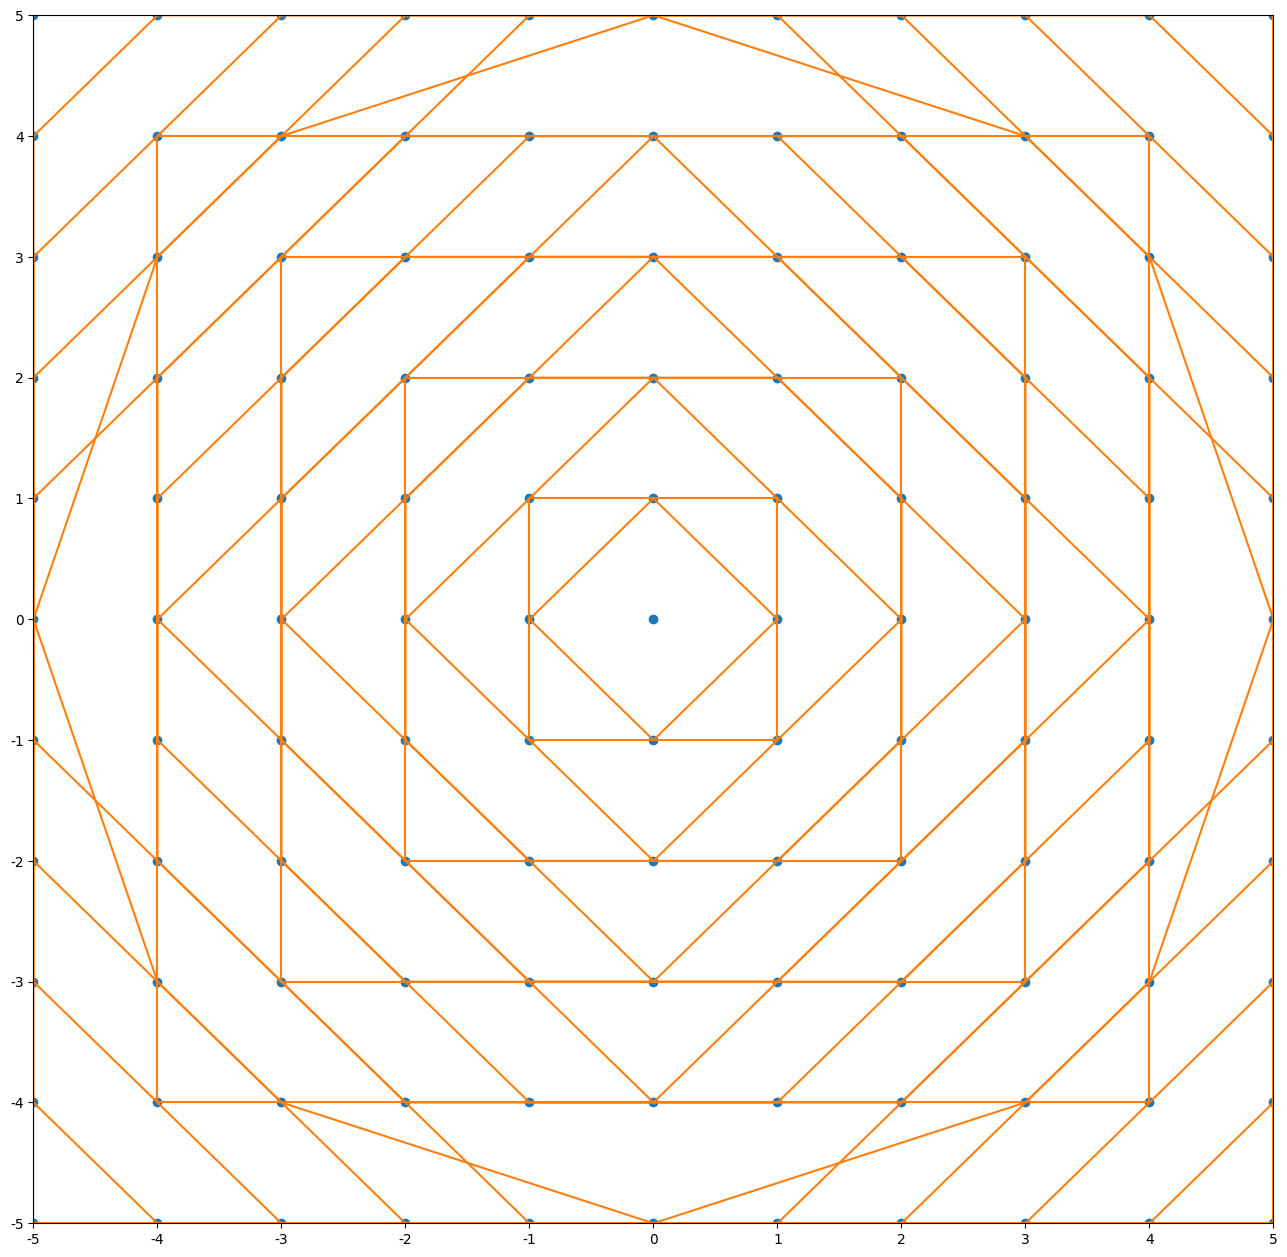

In [18]:
#Flat
fig, ax = draw_layout(empty_lattice)
plt.savefig(f'empty_lattice.jpg',bbox_inches='tight')

##### 3D View

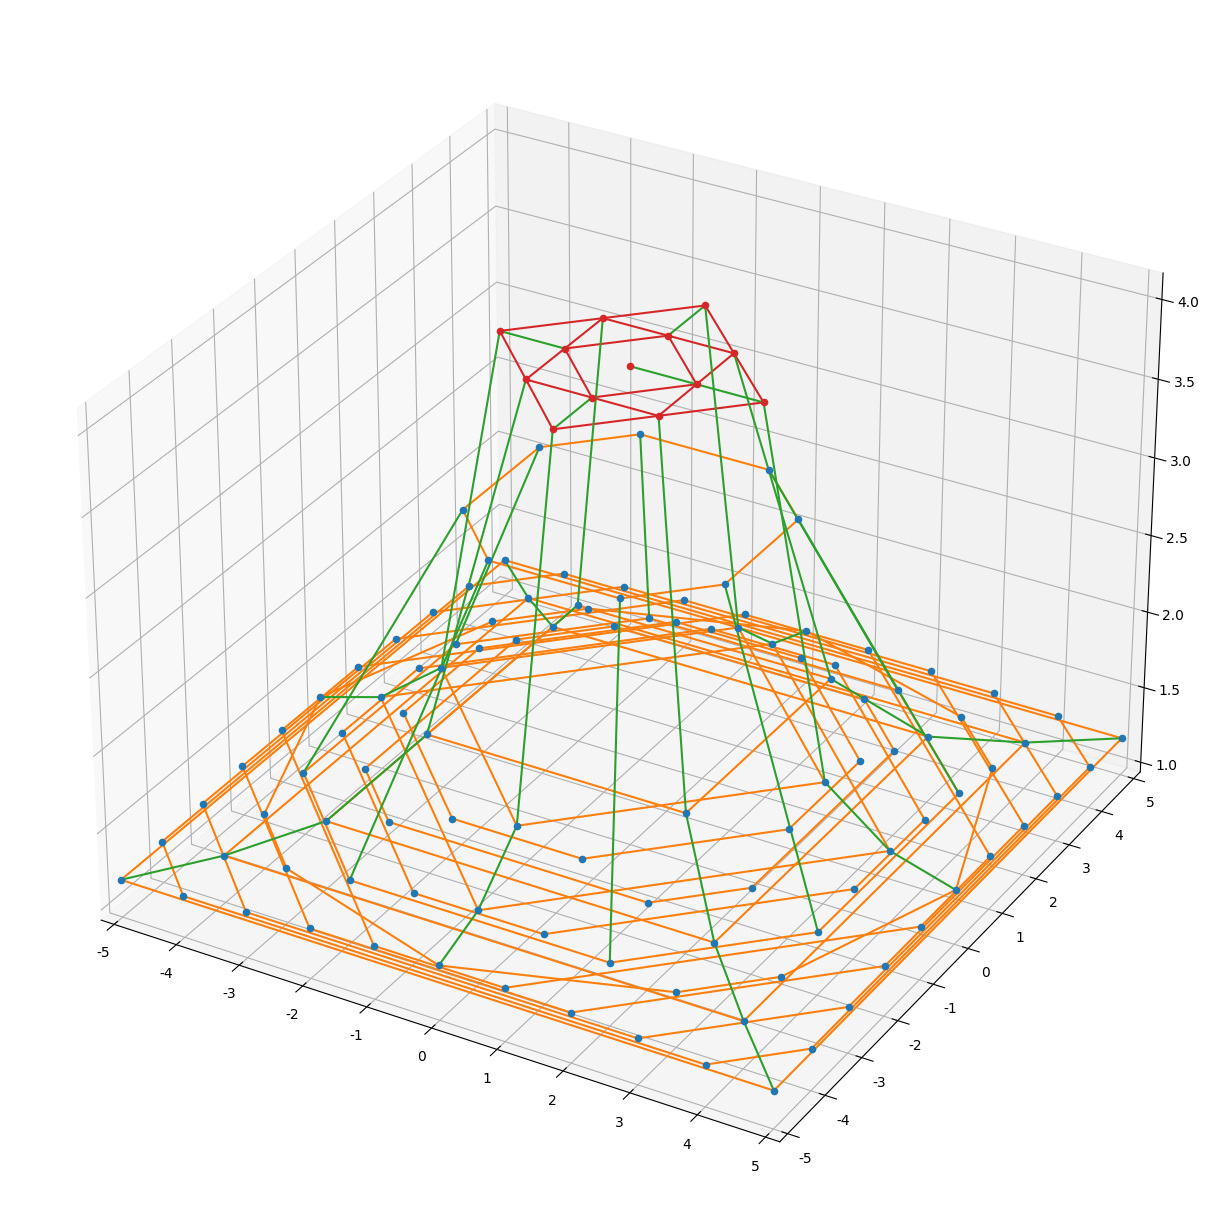

In [19]:
#3D
fig, ax = draw_layout_3D(empty_lattice)

plt.savefig(f'empty_lattice_with_curvature.jpg',bbox_inches='tight')

##### Rotating 3D View

In [20]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    fig, ax = draw_layout_3D(empty_lattice)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=90)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_embedded_lattice_with_phi.gif', writer=writer)

# The Stone

In [21]:
class Stone:
    def __init__(self, starting_coordinate, *, at_rest, energy_per_unit_mass=0, angular_momentum_per_unit_mass=0,):
        self.position = [starting_coordinate, ]
        if at_rest:
            self.energy_per_unit_mass = get_energy_per_unit_mass_at_shell(self.position[0].polar.r)
            self.angular_momentum_per_unit_mass = angular_momentum_per_unit_mass
        else:
            self.energy_per_unit_mass = energy_per_unit_mass
            self.angular_momentum_per_unit_mass = angular_momentum_per_unit_mass
    
    def get_path_taken(self):
        t_elapsed = [t for t in np.arange(0, len(self.position))]
        path = self.position.copy()
        path.reverse()
        return path, t_elapsed

# Geodesics

## Pathfinder

In [163]:
def effective_potential(stone: Stone):
    return (1 - _do_float_division_with_tolerance((2*M), stone.position[0].polar.r))*(1 + math.pow(_do_float_division_with_tolerance(stone.angular_momentum_per_unit_mass,  stone.position[0].polar.r), 2))

def V(angular_momentum_per_unit_mass, r_coord):
    return (1 - _do_float_division_with_tolerance((2*M), r_coord))*(1 + math.pow(_do_float_division_with_tolerance(angular_momentum_per_unit_mass,  r_coord), 2))

def dV_dr(position: Polar, angular_momentum_per_unit_mass: float)->float:
    numerator = M*math.pow(position.r, 2) + math.pow(angular_momentum_per_unit_mass, 2) * (3 * M - position.r)
    denominator = math.pow(position.r, 4)
    return _do_float_division_with_tolerance(numerator, denominator)

def dr_doubledot(position: Polar, angular_momentum_per_unit_mass: float)->float:
    return - dV_dr(position, angular_momentum_per_unit_mass)

# def dr_dot(stone: Stone)->float:
#     difference = _do_float_subtraction_with_tolerance(math.pow(stone.energy_per_unit_mass, 2), effective_potential(stone))
#     return -1*(_do_float_division_with_tolerance(difference, math.fabs(difference)))*math.sqrt(math.fabs(difference))

def dr_dot(stone: Stone)->float:
    difference = _do_float_subtraction_with_tolerance(math.pow(stone.energy_per_unit_mass, 2), effective_potential(stone))
    return -1*(_do_float_division_with_tolerance(difference, math.fabs(difference)))*math.sqrt(math.fabs(difference))

def calculate_path_using_verlet(stone: Stone, dtau: float)->None:
    coordinate_after_step = Coordinate(
        q1= stone.position[0].polar.r, 
        q2= stone.position[0].polar.phi, 
        is_cartesian=False
        )

    has_not_returned_to_initial_coordinates = True 

    current_position = stone.position[0].polar
    current_speed = dr_dot(stone) 
    current_acceleration = dr_doubledot(current_position, stone.angular_momentum_per_unit_mass)

    #Verlet Velocity Method https://en.wikipedia.org/wiki/Verlet_integration#Velocity_Verlet 
    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, (2*M)) and has_not_returned_to_initial_coordinates and len(stone.position) < 1001:

        dphi = (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * dtau

        next_position = Coordinate(
            q1=current_position.r + current_speed*dtau + current_acceleration*math.pow(dtau, 2)*0.5,
            q2=current_position.phi + dphi,
            is_cartesian=False
        )

        next_acceleration = dr_doubledot(next_position.polar, stone.angular_momentum_per_unit_mass)
        next_speed = current_speed + (current_acceleration + next_acceleration)*(dtau*0.5)

        #Guard against too big of a step:
        if next_position.polar.r <= 2*M:
            print(next_position.polar.r)
            return

        stone.position.insert(0, next_position)

        current_position = next_position.polar
        current_speed = next_speed
        current_acceleration = next_acceleration
    
    if not has_not_returned_to_initial_coordinates:
        print(f'{has_not_returned_to_initial_coordinates=}')

def calculate_path_using_stormer_verlet(stone: Stone, dtau: float)->None:
    current_speed = dr_dot(stone)
    current_acceleration = dr_doubledot(stone)

    coordinate_after_step = Coordinate(
        q1=stone.position[0].polar.r + current_speed*dtau + (1/2)*current_acceleration*math.pow(dtau, 2),
        q2=stone.position[0].polar.phi + (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * dtau
    )

    stone.position.insert(0, coordinate_after_step)

    #Verlet Velocity Method https://en.wikipedia.org/wiki/Verlet_integration#Velocity_Verlet 
    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, (2*M)) and len(stone.position) < 300:
        current_position = stone.position[0].polar
        current_speed = dr_dot(stone)

        previous_position = stone.position[1].polar

        current_acceleration = dr_doubledot(stone)

        coordinate_after_step = Coordinate(
            q1=2*current_position.r -previous_position.r + current_acceleration*math.pow(dtau, 2),
            q2=2*current_position.phi - previous_position.phi,
            is_cartesian=False
        )

        #Guard against too big of a step:
        if coordinate_after_step.polar.r <= 2*M:
            print(coordinate_after_step.polar.r)
            break

        stone.position.insert(0, coordinate_after_step)


## The Raindrop Path

In [113]:
box_size = 20
lattice_dimensions = Dimensions(left=-box_size, right=box_size, top=box_size, bottom=-box_size, resolution=1)
lattice = Latticework(dimensions=lattice_dimensions)

right_most_shell = lattice.get_coordinate_at_edge()

In [79]:
import math

def path_finder(stone: Stone, time_resolution: float):
    initial_r = stone.position[0].polar.r
    initial_phi = stone.position[0].polar.phi
    coordinate_after_step = Coordinate(q1= initial_r, q2= initial_phi, is_cartesian=False)

    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, 2*M) and len(stone.position) < 30:
        dr_BK_dot = 0
        dr_BK = - math.pow(get_curvature_factor(r_coordinate=stone.position[0].polar.r), 2) * math.sqrt(2*M / stone.position[0].polar.r) * time_resolution
        dphi_BK = (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * time_resolution
        coordinate_after_step = Coordinate(q1= stone.position[0].polar.r + dr_BK, q2= stone.position[0].polar.phi + dphi_BK)
        stone.position.insert(0, coordinate_after_step)

def specific_path_finder(stone: Stone, time_resolution: float):
    initial_r = stone.position[0].polar.r
    initial_phi = stone.position[0].polar.phi
    coordinate_after_step = Coordinate(q1= initial_r, q2= initial_phi, is_cartesian=False)
    
    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, (2*M)) and len(stone.position) < 300:
        current_r = stone.position[0].polar.r
        difference = math.pow(stone.energy_per_unit_mass, 2) - (1 - _do_float_division_with_tolerance((2*M), current_r))*(1 + math.pow(_do_float_division_with_tolerance(stone.angular_momentum_per_unit_mass,  current_r), 2))
        sign = _do_float_division_with_tolerance(math.fabs(difference), difference)
        equation_of_motion = sign*math.sqrt(math.fabs(difference))*time_resolution
        dphi_BK = (stone.angular_momentum_per_unit_mass / math.pow(current_r, 2)) * time_resolution
        coordinate_after_step = Coordinate(
            q1=current_r + equation_of_motion,
            q2=stone.position[0].polar.phi + dphi_BK,
            is_cartesian=False
        )

        if _do_float_eq_with_tolerance(coordinate_after_step.polar.phi, stone.position[-1].polar.phi) and _do_float_eq_with_tolerance(coordinate_after_step.polar.r, stone.position[-1].polar.r):
            break

        if coordinate_after_step.polar.r <= 2*M:
            print(coordinate_after_step.polar.r)
            return
        
        stone.position.insert(0, coordinate_after_step)

In [135]:
import matplotlib.pyplot as plt

def draw_path(lattice, stone, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot()
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
        rings.append((np.asarray(xs), np.asarray(ys)))

    for ring in rings:
        ax.plot(ring[0], ring[1], c='C1')

    for vertices, coordinate in lattice.vertices.items():
        ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, c='C0')

    xs = [ ]
    ys = [ ]
    for stone_position in stone.position:
        xs.append(stone_position.cartesian.x)
        ys.append(stone_position.cartesian.y)
    
    ax.plot(np.asarray(xs), np.asarray(ys), c='C4') 

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    return fig, ax

import time

def draw_path_3D(lattice, stone, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')
    
    path_start = time.perf_counter_ns()
    path_coordinates, elapsed_time = stone.get_path_taken()
    path_elapsed = time.perf_counter_ns() - path_start

    xs = [ ]
    ys = [ ]
    for step in path_coordinates:
        xs.append(step.cartesian.x)
        ys.append(step.cartesian.y)
    
    ax.plot(np.asarray(xs), np.asarray(ys), np.multiply(np.asarray(elapsed_time), time_resolution), c='C4', linewidth=3.0) 

    rings_start = time.perf_counter_ns()
    rings = [ ]
    phi_with_r = { }
    # for r in lattice.shells["r"].keys():
    for r in np.arange(8,lattice.get_coordinate_at_edge().polar.r):
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r, ascending=False)

        closest_time = elapsed_time[-1]*time_resolution
        for step in path_coordinates:
            if _do_float_gt_with_tolerance(coordinates_with_r[0].polar.r, step.polar.r):
                closest_time = elapsed_time[path_coordinates.index(step)]*time_resolution
                break
        phi_with_r.update({ coordinates_with_r[0].polar.r : closest_time})
        xs = [ ]
        ys = [ ]
        zs = [closest_time for t in np.arange(0, len(coordinates_with_r)) ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)

        is_le_2M = _do_float_le_with_tolerance(coordinates_with_r[0].polar.r, 2*M)
        rings.append((np.asarray(xs), np.asarray(ys), np.asarray(zs), is_le_2M))

    rings_elapsed = time.perf_counter_ns() - rings_start

    for ring in rings:
        if ring[3]:
            ax.plot(ring[0], ring[1], ring[2], color=(1.0, 0, 0, 0.5), linewidth=1.5)
        else:
            ax.plot(ring[0], ring[1], ring[2], color=(0.25, 0.25, 0.25, 0.75), linewidth=1.0)

    # for vertices, coordinate in lattice.vertices.items():
    #     if coordinate.polar.r <= 2.0:
    #         ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, (elapsed_time[-1])*time_resolution, s=3, color=(1.0, 0, 0, 0.5))
    #     else:
    #         ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, (elapsed_time[-1])*time_resolution, s=3, color=(0, 0, 0, 0.5))
    
    curves_start = time.perf_counter_ns()

    curves = [ ]
    # for phi in lattice.shells["phi"].keys():
    for phi in np.linspace(0, 2*np.pi, num=8):
        # coordinates_with_phi = lattice.get_coordinates_of_constant_phi(phi)
        coordinates_with_phi = [Coordinate(q1=r, q2=phi, is_cartesian=False) for r in np.arange(8, lattice.get_coordinate_at_edge().polar.r -1)]
        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_phi:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)

            for r, t in phi_with_r.items():
                if r == coordinate.polar.r:
                    zs.append(t)

            is_le_2M = _do_float_le_with_tolerance(coordinates_with_phi[0].polar.r, 2*M)
            # if is_le_2M == False:
            #     for step in path_coordinates:
            #         if _do_float_gt_with_tolerance(coordinates_with_phi[0].polar.r, step.polar.r):
            #             zs.append(elapsed_time[path_coordinates.index(step)])
            #             break
            # else:
            #     zs.append(elapsed_time[-1])
        #     if (coordinate.polar.r > 2.0):
        #         zs.append(np.true_divide(1, coordinate.curvature))
        #     else:
        #         zs.append(4)
        curves.append((np.asarray(xs), np.asarray(ys), np.asarray(zs), is_le_2M))

    curves_elapsed = time.perf_counter_ns() - curves_start

    for curve in curves:
        # if curve[3]:
        #     ax.plot(curve[0], curve[1], curve[2], color=(1.0, 0, 0, 0.5), linewidth=1.5)
        # else:
        ax.plot(curve[0], curve[1], curve[2], color=(0.25, 0.25, 0.25, 0.5), linewidth=1.0)

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=(elapsed_time[-1])*time_resolution, top=elapsed_time[0]*time_resolution,)

    return fig, ax, path_elapsed, rings_elapsed, curves_elapsed

### Without Angular Momentum

draw_path_3D Total: 1.9772196000000002 path=34800 rings=182590100 curves=26138200


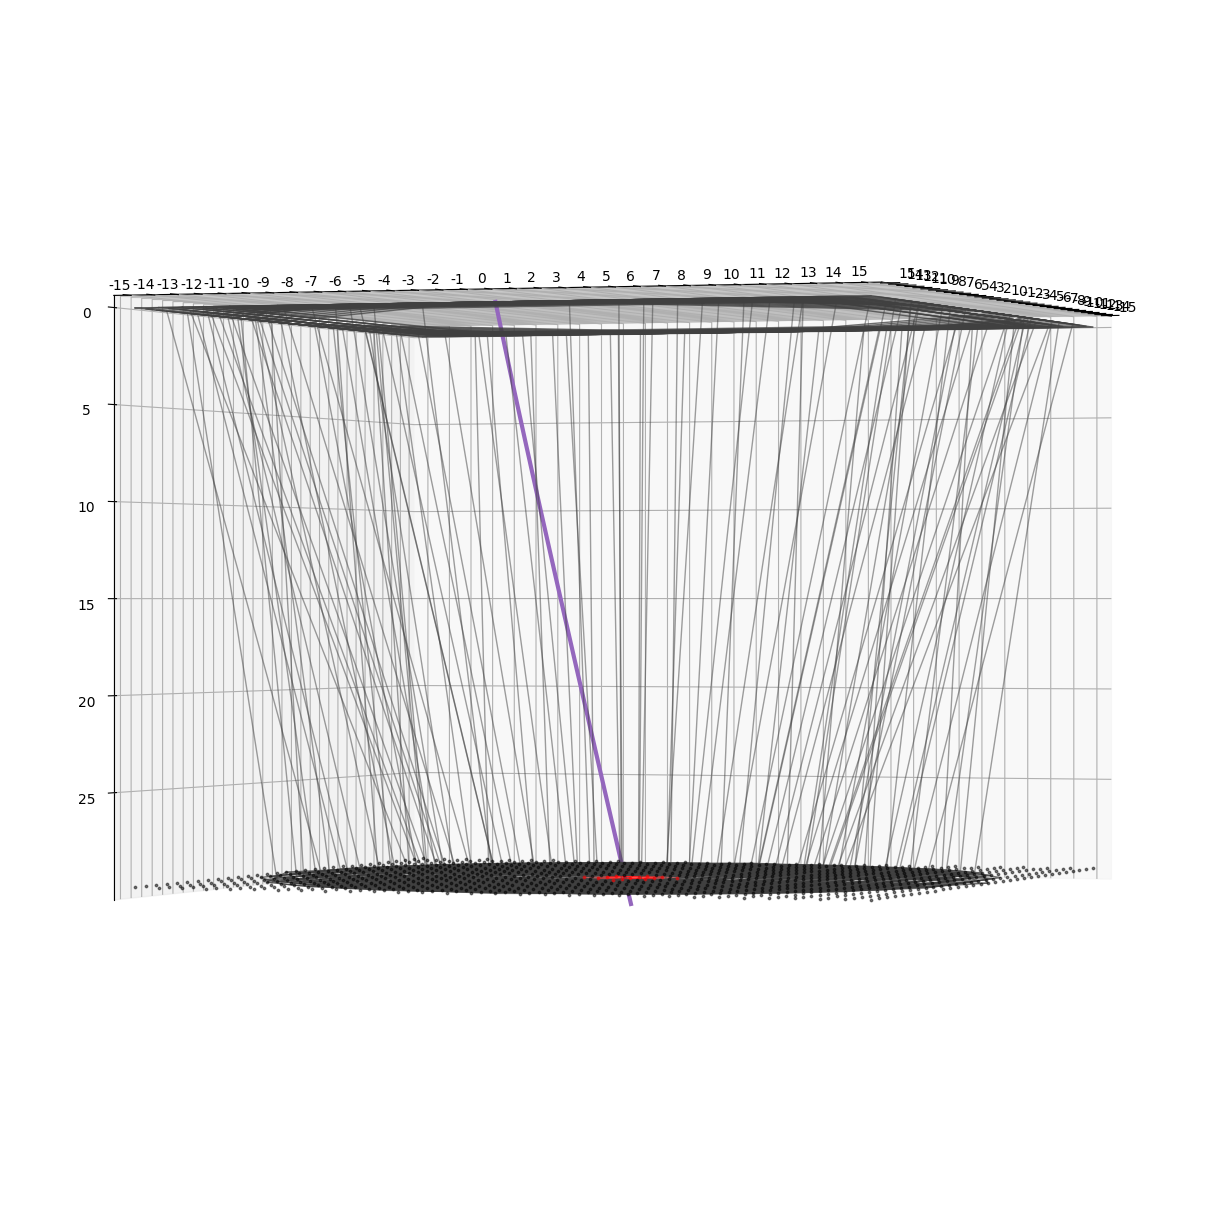

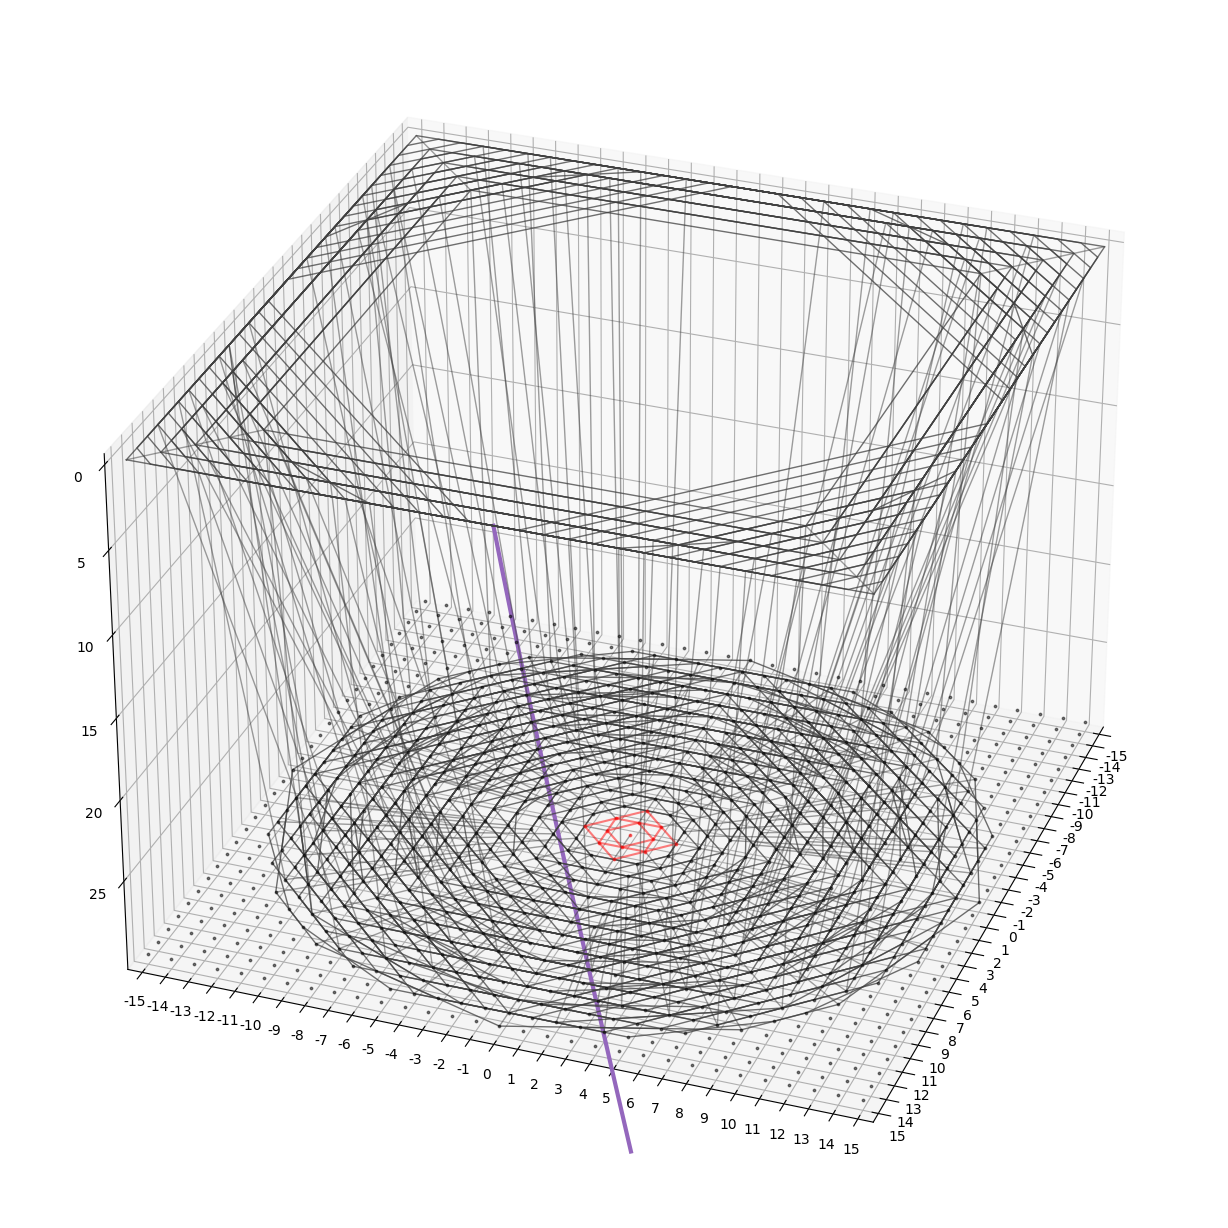

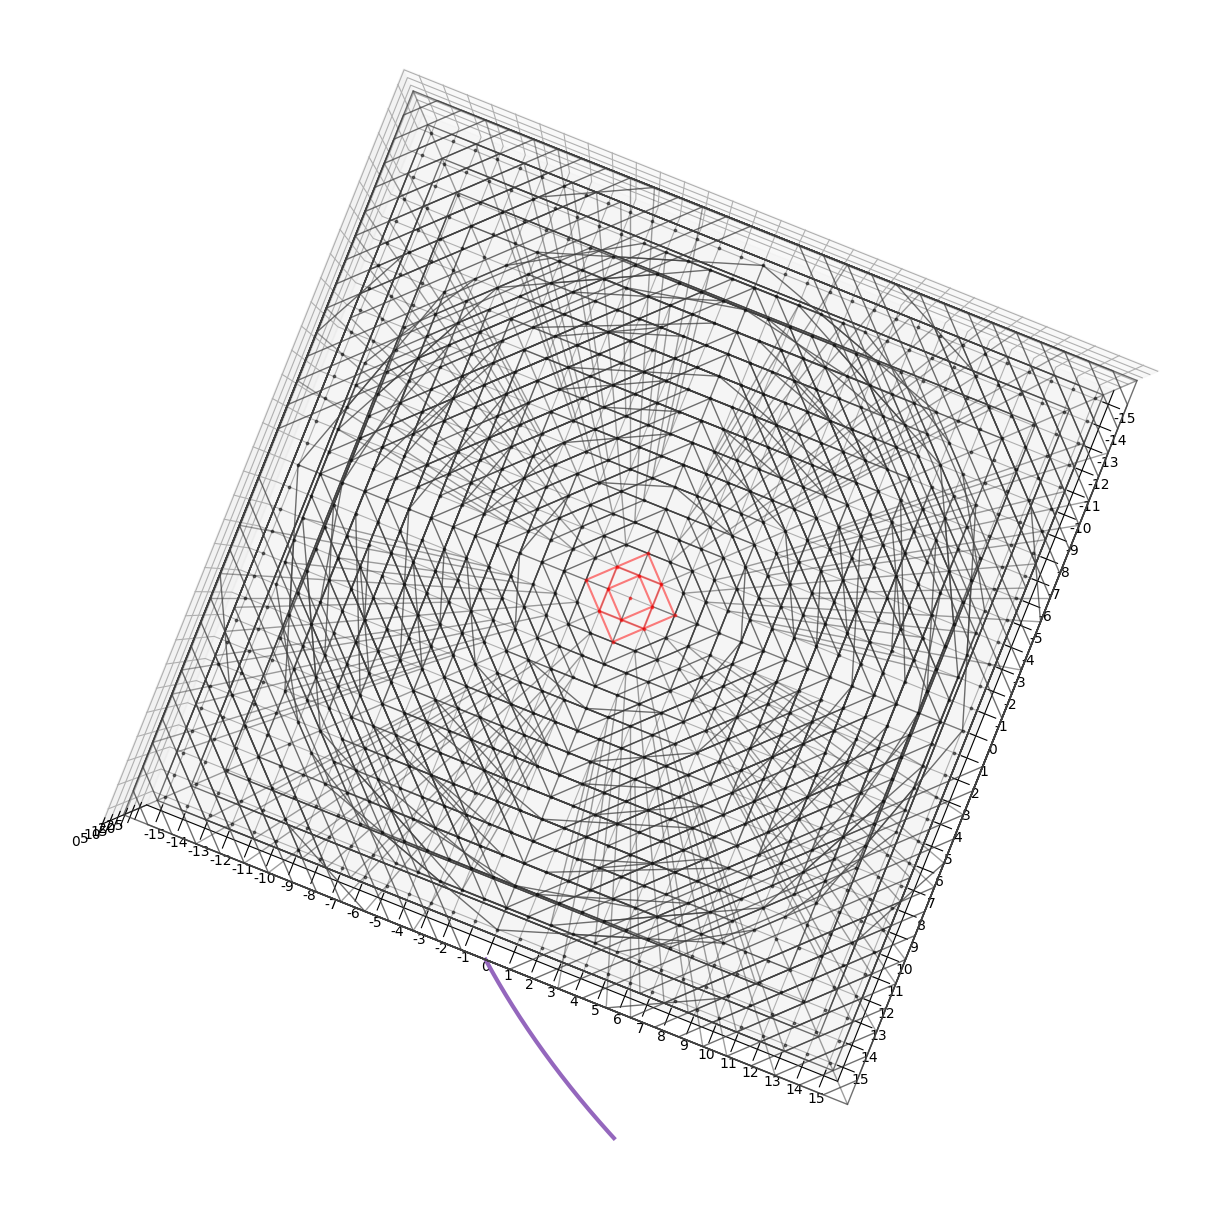

In [26]:
# fig, ax = draw_path(lattice, stone)
import time
time_resolution = 0.1
stone = Stone(right_most_shell, at_rest=False, energy_per_unit_mass=1, angular_momentum_per_unit_mass=4)
specific_path_finder(stone, time_resolution=time_resolution)

start = time.perf_counter_ns()
fig, ax, path, rings, curves = draw_path_3D(lattice, stone)
elapsed = time.perf_counter_ns() - start
print("draw_path_3D", f'Total: {elapsed*(10**-9)}', f'{path=}', f'{rings=}', f'{curves=}')
ax.view_init(0, 20)

fig, ax, path, rings, curves = draw_path_3D(lattice, stone)
ax.view_init(30, 20)

fig, ax, path, rings, curves = draw_path_3D(lattice, stone)
ax.view_init(90, 20)


# stone = Stone(right_most_shell, at_rest=True, angular_momentum_per_unit_mass=2)
# specific_path_finder(stone, time_resolution=time_resolution)

# start = time.perf_counter_ns()
# fig, ax, path, rings, curves = draw_path_3D(lattice, stone)
# elapsed = time.perf_counter_ns() - start
# print("draw_path_3D", f'Total: {elapsed*(10**-9)}', f'{path=}', f'{rings=}', f'{curves=}')
# ax.view_init(0, 0)

# path, time_elapsed = stone.get_path_taken()

# for step, t in zip(path, time_elapsed):
#     print(f'{t=}:     {step.polar.r}')

# stone = Stone(
#     starting_coordinate=right_most_shell,
#     at_rest=True,
#     angular_momentum_per_unit_mass=0
# )
# calculate_path_using_verlet(stone, dtau=time_resolution)
# fig, ax, *rest = draw_path_3D(lattice, stone)


In [27]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    time_resolution = 1
    stone = Stone(right_most_shell, at_rest=True, angular_momentum_per_unit_mass=0)
    specific_path_finder(stone, time_resolution=time_resolution)

    fig, ax = draw_path_3D(lattice, stone)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=90)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_stone_rain_no_angular_momentum_shell_observer.gif', writer=writer)

In [28]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    time_resolution = 1
    stone = Stone(
        starting_coordinate=right_most_shell,
        at_rest=True,
        angular_momentum_per_unit_mass=0
    )
    path_finder(stone, time_resolution=time_resolution)

    fig, ax = draw_path_3D(lattice, stone)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=90)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_stone_rain_no_angular_momentum_bookkeeper.gif', writer=writer)

### With Angular Momentum

Calculate circular orbit `r` for given angular momentum

In [29]:
import math

stone = Stone(
    starting_coordinate=right_most_shell,
    at_rest=True,
    angular_momentum_per_unit_mass=math.sqrt(12)
)

_r = _do_float_division_with_tolerance(math.pow(stone.angular_momentum_per_unit_mass, 2), 2*M) * ( 1 + math.sqrt(math.fabs(1 - _do_float_division_with_tolerance(12*math.pow(M, 2), math.pow(stone.angular_momentum_per_unit_mass, 2)))))
print(_r) 

print(stone.angular_momentum_per_unit_mass/math.pow(stone.position[0].polar.r, 2))

6.000000089406966
0.01539600717839002


Default viewing angles: `elev = 30` and `azim = -60` 

dr_doubledot(stone.position[0].polar, stone.angular_momentum_per_unit_mass)=-0.0
dr_dot(stone)=-0.1003696870278766
stone.angular_momentum_per_unit_mass=4
<class 'matplotlib.axes._subplots.Axes3DSubplot'>


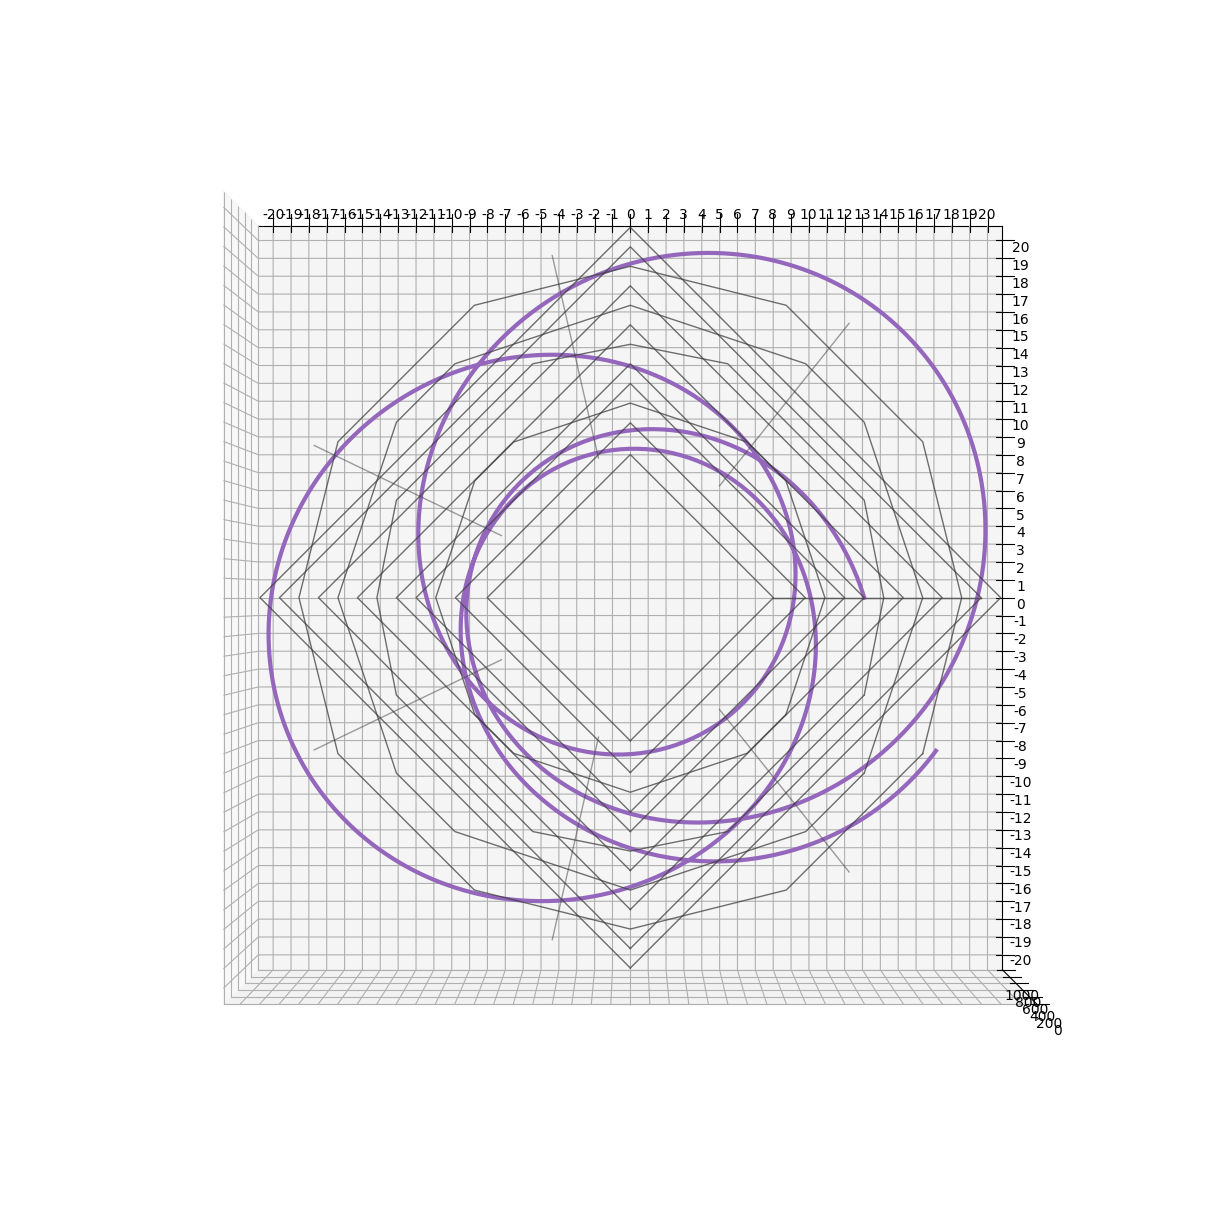

In [177]:

time_resolution = 1

stone = Stone(
        Coordinate(12, 0, is_cartesian=False), 
        at_rest=False,
        energy_per_unit_mass=math.sqrt(V(4, 20)),
        angular_momentum_per_unit_mass=4
    )

print(f'{dr_doubledot(stone.position[0].polar, stone.angular_momentum_per_unit_mass)=}')
print(f'{dr_dot(stone)=}')
print(f'{stone.angular_momentum_per_unit_mass=}')

calculate_path_using_verlet(stone, dtau=time_resolution)

path, *rest = stone.get_path_taken()

# matches = [step for step in path if _do_float_eq_with_tolerance(step.polar.r, stone.position[-1].polar.r) and (_do_float_le_with_tolerance(step.polar.phi, (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * time_resolution) or _do_float_ge_with_tolerance(step.polar.phi, 2*np.pi - (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * time_resolution))]

# for match in matches:
#     print(f'{match.polar.r}, {match.polar.phi}')

fig, ax, *rest = draw_path_3D(lattice, stone)

print(type(ax))

ax.view_init(90, -90)

# fig,ax = draw_path(lattice, stone)

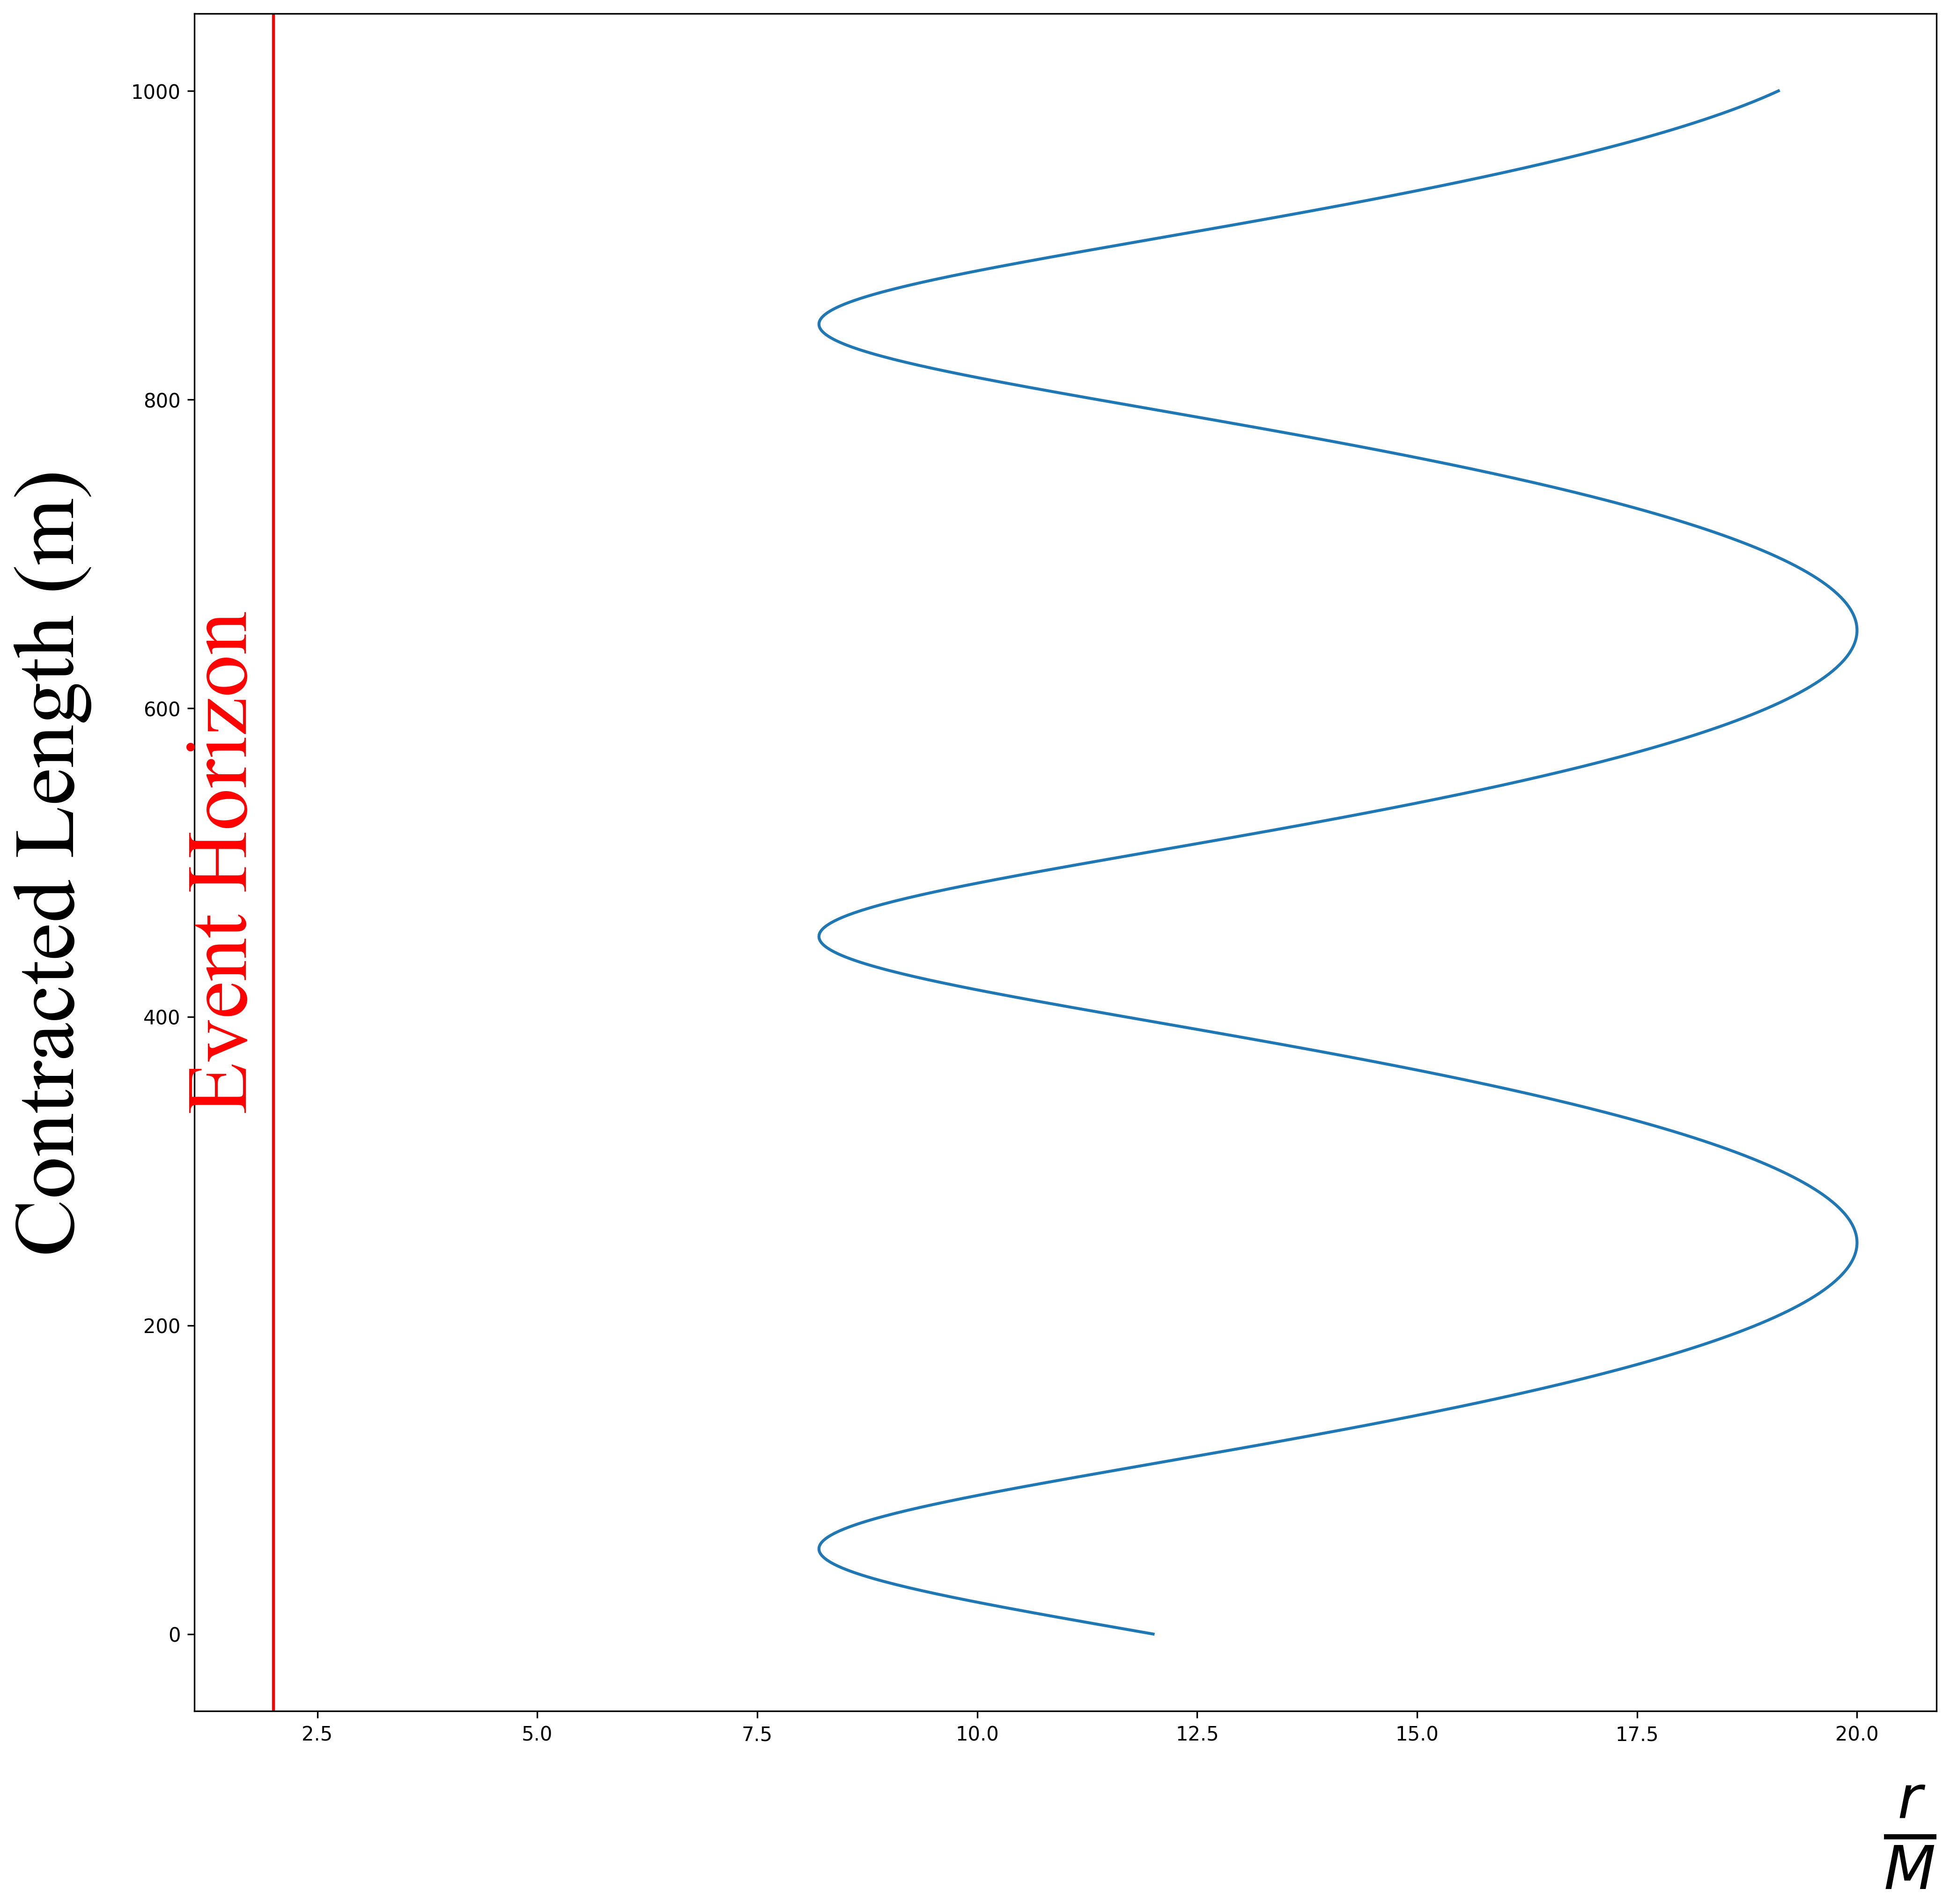

In [165]:
from matplotlib.font_manager import FontProperties
import math

path, timecoord = stone.get_path_taken()

rcoord = np.asarray([step.polar.r for step in path])
tcoord = np.asarray(timecoord)

figure_size = (16,16)

general_plot_font = FontProperties()
general_plot_font.set_family('serif')
general_plot_font.set_name('Times New Roman')
general_plot_font.set_size(30)

axes_plot_font = FontProperties()
axes_plot_font.set_family('serif')
axes_plot_font.set_name('Times New Roman')
axes_plot_font.set_size(44)

math_plot_font = FontProperties()
math_plot_font.set_family('serif')
math_plot_font.set_name('Times New Roman')
math_plot_font.set_size(40)

plot_info = {
    "title" : "",
    "x_axis" : {
        "label" : r"$\frac{r}{M}$",
        "lim" : (x_offset, rcoord[-1]),
        "ticks" : np.insert(np.arange(x_start,rcoord[-1]+1,scale_factor),0,2),
        "tick_labels" : ['2'] + [f'{int(tick)}' for tick in np.arange(x_start,rcoord[-1]+1,scale_factor)],
        "offset" : 0,
    },
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

def create_curvature_figure(ax, BK_coordinate, shell_coordinates, plot_info, ):
    ax.set_title(plot_info['title'], fontproperties=plot_info['font']['axes'],)

    ax.set_xlabel(plot_info['x_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20, loc='right')
    # ax.set_xlim(plot_info['x_axis']['lim'])
    # ax.set_xticks(plot_info['x_axis']['ticks'])
    # ax.set_xticklabels(plot_info['x_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.set_ylabel(plot_info['y_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20)
    # ax.set_ylim(plot_info['y_axis']['lim'])
    # ax.set_yticks(plot_info['y_axis']['ticks'])
    # ax.set_yticklabels(plot_info['y_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.plot(BK_coordinate, shell_coordinates)
    return ax

diagram = 'r_vs_t'

y_ticks = [tick*time_resolution for tick in np.linspace(timecoord[0], timecoord[-1], num=10)]

fig = plt.figure(figsize=figure_size, dpi=300)
ax_curvature = fig.add_subplot()

plot_info.update({
    "y_axis" : {
        "label" : "Contracted Length (m)",
        "lim" : (timecoord[0], timecoord[-1]),
        "ticks" : [1,] + y_ticks,
        "tick_labels" : ['1.00'] + [f"{tick:1.2f}" for tick in y_ticks],
    }
})

ax_curvature = create_curvature_figure(ax_curvature, rcoord, tcoord, plot_info,)

# Mark Event Horizon
plt.axvline(
    x=2,
    color="red",
    linestyle="solid"
)
ax_curvature.text(
    1.9,
    np.mean(y_ticks), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['axes'], 
    rotation='vertical', 
    horizontalalignment='right', 
    verticalalignment='center'
)

plt.show()

In [172]:
def draw_path_3D_animated(lattice, stone, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=(elapsed_time[-1])*time_resolution, top=elapsed_time[0]*time_resolution,)

    return fig, ax

In [219]:
calculate_path_using_verlet(stone, dtau=time_resolution)

path, elapsed_time = stone.get_path_taken()

max_r = max(path, key=lambda x: x.polar.r).polar.r
min_r = min(path, key=lambda x: x.polar.r).polar.r

rings = [step.polar.r for step in path if step.polar.r in shells_of_r]
shell_rs = [ shell_r for shell_r in lattice.shells["r"].keys() if shell_r <= max_r and shell_r >= min_r]

for shell_r in shell_rs:
    print(shell_r)

path_rs = [round(step.polar.r, 0) for step in path]
set_rs = list(set(path_rs))

set_rs.sort()

for i in set_rs:
    print(i)

# print("---")

# for r in lattice.shells["r"].keys():
#     print(r)

matches = [shell_r for step, shell_r in zip(set_rs, shell_rs) if _do_float_eq_with_tolerance(step, shell_r) ]

# for step in set_rs:
#     shell_r_match = 0
#     keep_r = False
#     for shell_r in shell_rs:
#         if _do_float_eq_with_tolerance(step, shell_r):
#             keep_r = True
#             shell_r_match = shell_r
#             break
#     if keep_r:
#         matches.append(shell_r_match)
#         shell_rs.remove(shell_r_match)

for shell_r in matches:
    print(shell_r)

# for step in stone.get_path_taken()[0]:
#     if step.polar.r in lattice.shells["r"].keys():
#         print(step.polar.r)
# print(len(stone.get_path_taken()[1]))

8.246211251235321
8.48528137423857
8.54400374531753
8.602325267042627
8.94427190999916
9.0
9.055385138137417
9.219544457292887
9.433981132056603
9.486832980505138
9.848857801796104
9.899494936611665
10.0
10.04987562112089
10.198039027185569
10.295630140987
10.44030650891055
10.63014581273465
10.770329614269007
10.816653826391969
11.0
11.045361017187261
11.180339887498949
11.313708498984761
11.40175425099138
11.661903789690601
11.704699910719626
12.0
12.041594578792296
12.083045973594572
12.165525060596439
12.206555615733702
12.36931687685298
12.529964086141668
12.649110640673518
12.727922061357855
12.806248474865697
13.0
13.038404810405298
13.152946437965905
13.341664064126334
13.416407864998739
13.45362404707371
13.601470508735444
13.892443989449804
13.92838827718412
14.0
14.035668847618199
14.142135623730951
14.212670403551895
14.317821063276353
14.422205101855956
14.560219778561036
14.7648230602334
14.866068747318506
15.0
15.033296378372908
15.132745950421556
15.231546211727817
15.2

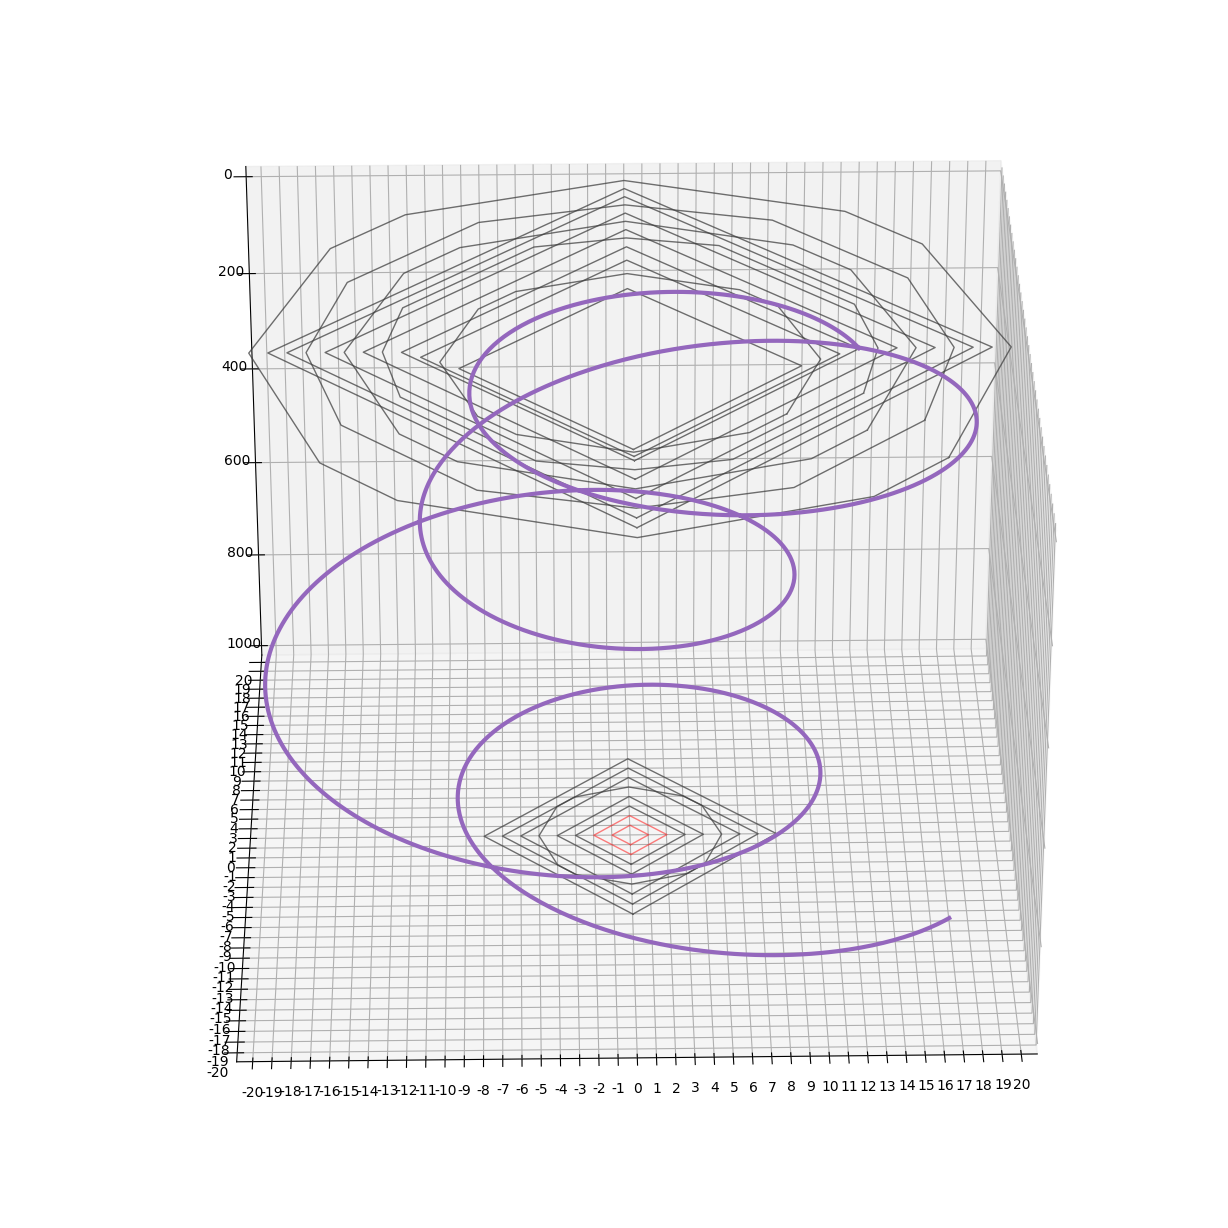

In [245]:
import matplotlib.animation as animation

do_animation = True

def update_lines(frame_number, rings: list, curves, lines, ax):
    if frame_number >= len(stone.get_path_taken()[1]):
        current_angle = -90 + frame_number - len(stone.get_path_taken()[1])
        ax.view_init(30, current_angle)
    else:
        r = stone.position[frame_number].polar.r

        stone_xs = np.asarray([step.cartesian.x for step in stone.get_path_taken()[0][:frame_number]])
        stone_ys = np.asarray([step.cartesian.y for step in stone.get_path_taken()[0][:frame_number]])
        stone_ts = np.multiply(np.asarray([t for t in stone.get_path_taken()[1][:frame_number]]), time_resolution)

        lines[-1].set_data_3d(stone_xs, stone_ys, stone_ts)

        for index, ring_r in enumerate(rings):
            ring = lattice.get_coordinates_of_constant_r(ring_r, ascending=False)
            ring_xs = np.asarray([vertex.cartesian.x for vertex in ring])
            ring_ys = np.asarray([vertex.cartesian.y for vertex in ring])
            closest_time = elapsed_time[-1]*time_resolution
            for i, step in enumerate(path):
                if _do_float_gt_with_tolerance(ring_r, step.polar.r) and frame_number >= elapsed_time[i]:
                    closest_time = elapsed_time[i]*time_resolution
                    break
            ring_ts = np.asarray([closest_time for t in np.arange(0, len(ring))])
            lines[index].set_data_3d(ring_xs, ring_ys, ring_ts)

    return lines

if do_animation:
    time_resolution = 1
    stone = Stone(
        Coordinate(12, 0, is_cartesian=False), 
        at_rest=False,
        energy_per_unit_mass=math.sqrt(V(4, 20)),
        angular_momentum_per_unit_mass=4
    )
    calculate_path_using_verlet(stone, dtau=time_resolution)

    path, elapsed_time = stone.get_path_taken()

    fig, ax = draw_path_3D_animated(lattice, stone)

    shells_of_phi = list(lattice.shells["phi"].keys())

    rings = [r for r in np.arange(0,21)]
    curves = [step.polar.phi for step in path if step.polar.phi in shells_of_phi]
    stones = [ stone, ]

    lines = [ ]
    for _ in rings:
        if _do_float_le_with_tolerance(_, 2*M):
            lines.append(ax.plot([], [], [], color=(1.0, 0, 0, 0.5), linewidth=1.0)[0])
        else:
            lines.append(ax.plot([], [], [], color=(0.25, 0.25, 0.25, 0.75), linewidth=1.0)[0])
        
    lines.extend([ax.plot([], [], [], color=(0.25, 0.25, 0.25, 0.75), linewidth=1.0)[0] for _ in curves])
    lines.extend([ax.plot([], [], [], c='C4', linewidth=3.0)[0] for _ in stones])

    for elevation in [30, ]:
        ax.view_init(elevation, -90)

        frames = len(stone.get_path_taken()[1])

        if elevation == 30:
            frames = len(stone.get_path_taken()[1]) + 360

        anim = animation.FuncAnimation(fig, update_lines, frames=frames, fargs=(rings, curves, lines, ax)) #

        writer = animation.PillowWriter(fps=30)
        from pathlib import Path
        file = Path().absolute()

        anim.save(f'{file}\\stone_{stone.angular_momentum_per_unit_mass}_at_{stone.position[-1].polar.r}_orbit_{elevation}.gif', writer=writer, dpi=100)

In [31]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    
    time_resolution = 1
    stone = Stone(
        starting_coordinate=right_most_shell,
        at_rest=True,
        angular_momentum_per_unit_mass=2
    )
    path_finder(stone, time_resolution=time_resolution)

    fig, ax = draw_path_3D(lattice, stone)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=360)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_stone_rain_some_angular_momentum_bookkeeper_reversed_time.gif', writer=writer, dpi=100)

for funsies:

1.1087749004304772


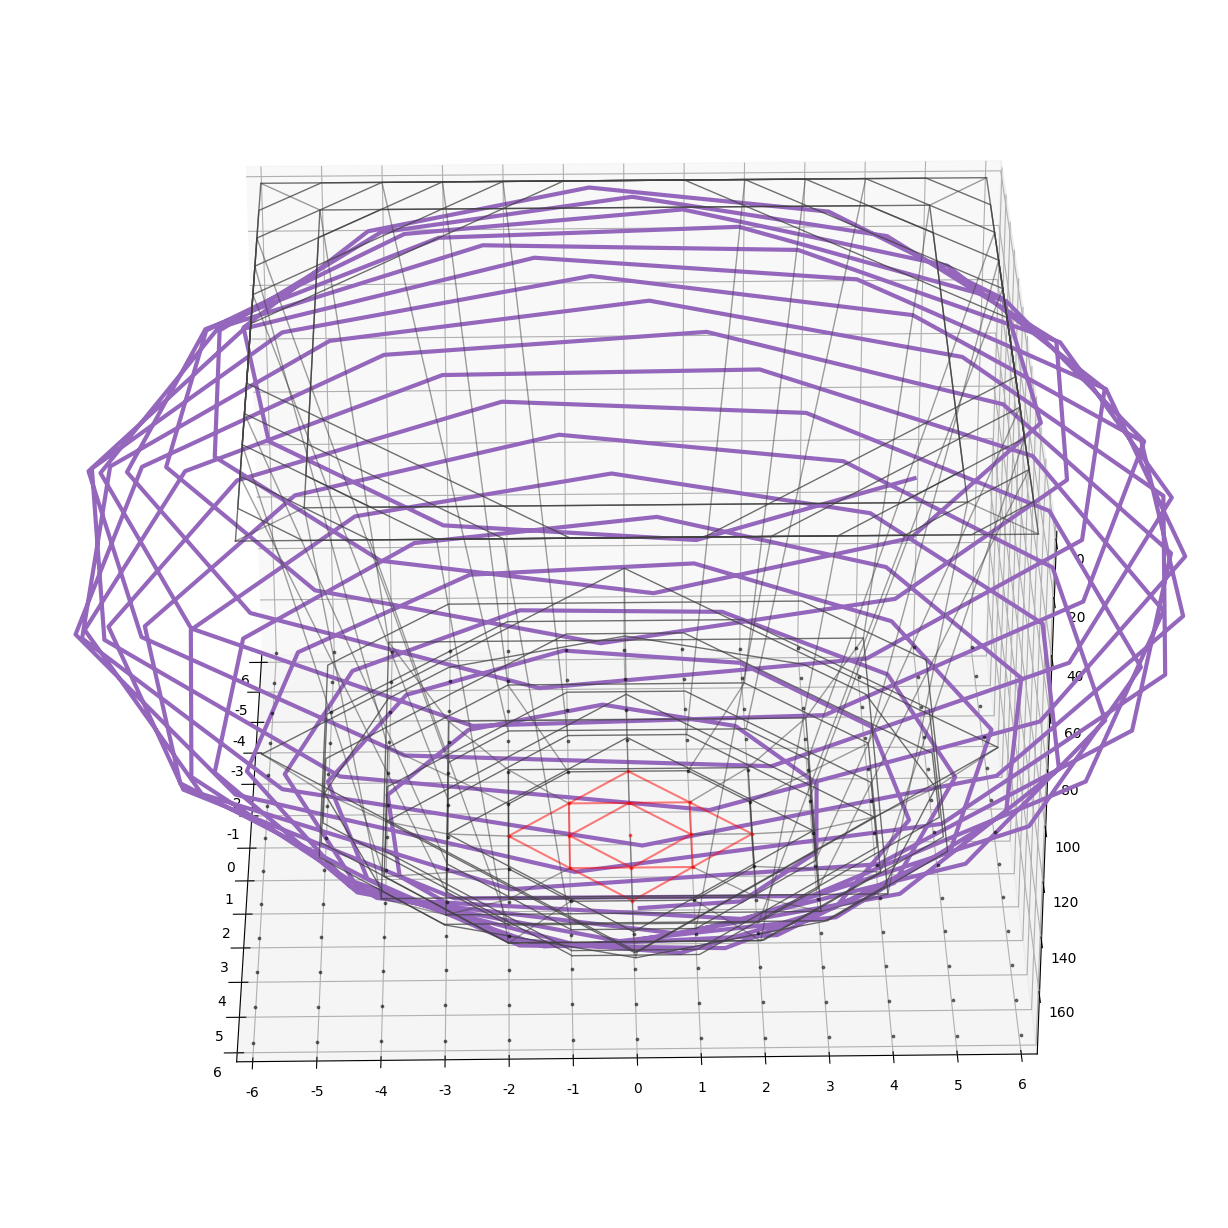

In [191]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    time_resolution = 1
    stone = Stone(
            Coordinate(6, np.pi/4, is_cartesian=False), 
            at_rest=False,
            energy_per_unit_mass= math.sqrt(V(math.sqrt(12), 6)),
            angular_momentum_per_unit_mass=math.sqrt(12)
        )
    calculate_path_using_stormer_verlet(stone, dtau=time_resolution)

    fig, ax, *rest = draw_path_3D(lattice, stone)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=360)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_stone_rain_some_angular_momentum_shell_observers_reversed_time_stormerverlet.gif', writer=writer, dpi=100)

## Optimized Draw

In [32]:
def set_time_intersection_with_lattice_data(lattice, stone: Stone):
    rings = [ ]
    curves = [ ]
    stone_path = [ [[ ], [ ]], [ ], ]

    path_coordinates, elapsed_time = stone.get_path_taken()

    all_possible_r = list(lattice.shells["r"].keys())
    all_possible_phi = list(list(lattice.shells["phi"].keys()))

    path_neighbors = [ ]
    for step in path_coordinates:
        stone_path[0][0].append(step.cartesian.x)
        stone_path[0][1].append(step.cartesian.y)
        stone_path[1].append(elapsed_time[path_coordinates.index(step)])

        #find closest r and phi for step
        closest_r = min(all_possible_r, key = lambda x: abs(x-step.polar.r))
        closest_phi = min(all_possible_phi, key = lambda x: abs(x-step.polar.phi))
        #save the elapsed time with this coordinate

        path_neighbors.append( (Coordinate(q1=closest_r, q2=closest_phi, is_cartesian=False), elapsed_time[path_coordinates.index(step)],) )

    previous_r = None
    r_and_time = { }
    for neighboring_coordinate, time_position in path_neighbors:
        filtered_rings = None
        r_s = [ ]
        if previous_r is not None:
            if _do_float_lt_with_tolerance(previous_r, neighboring_coordinate.polar.r ) == False:
                r_s = [k for k in all_possible_r if _do_float_ge_with_tolerance(k, neighboring_coordinate.polar.r) and _do_float_lt_with_tolerance(k, previous_r)]
        else:
            r_s = [k for k in all_possible_r if _do_float_ge_with_tolerance(k, neighboring_coordinate.polar.r) and _do_float_le_with_tolerance(k, path_coordinates[0].polar.r)]

        if r_s:
            previous_r = r_s[0]
            for r in r_s:
                r_and_time.update( { r : time_position})

    phi_curves = { }

    for r, t in r_and_time.items():
        ring_coords = lattice.get_coordinates_of_constant_r(r)
        ring = [ [ ], [ ], [ ], ]
        for coord in ring_coords:
            ring[0].append(coord.cartesian.x)
            ring[1].append(coord.cartesian.y)
            if coord.polar.phi not in phi_curves.keys():
                # print(r, t)
                phi_curves.update({coord.polar.phi : [t,]})
            else:
                # print(r, t)
                phi_curves[coord.polar.phi].append(t)
            ring[2].append(t)
        rings.append( (np.asarray(ring[0]), np.asarray(ring[1]), np.asarray(ring[2]), _do_float_le_with_tolerance(r, 2*M)) )

    # print("\n \n")

    for phi, times_for_r in phi_curves.items():
        phi_coords = lattice.get_coordinates_of_constant_phi(phi)
        curve = [ [ ], [ ], [ ], [ ]]
        times_for_r.reverse()
        for coord, t in zip(phi_coords, times_for_r):
            curve[0].append(coord.cartesian.x)
            curve[1].append(coord.cartesian.y)
            curve[2].append(t)
            # print(coord.polar.r, t)
            curve[3].append(_do_float_le_with_tolerance(coord.polar.r, 2*M))
        curves.append( (np.asarray(curve[0]), np.asarray(curve[1]), np.asarray(curve[2]), curve[3]) )
    stone_path = [ np.asarray(stone_path[0][0]), np.asarray(stone_path[0][1]), np.asarray(stone_path[1]) ]

    return rings, curves, stone_path

def draw_path_3D_with_data(rings, curves, path, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')

    ax.plot(path[0], path[1], path[2], c='C4', linewidth=3.0) 

    for ring in rings:
        if ring[3]:
            ax.plot(ring[0], ring[1], ring[2], color=(1.0, 0, 0, 0.5), linewidth=1.5)
        else:
            ax.plot(ring[0], ring[1], ring[2], color=(0.25, 0.25, 0.25, 0.75), linewidth=1.0)

    for vertices, coordinate in lattice.vertices.items():
        if coordinate.polar.r <= 2.0:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, path[2][-1]+time_resolution, s=5, color=(1.0, 0, 0, 0.5))
        else:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, path[2][-1]+time_resolution, s=5, color=(0, 0, 0, 0.5))

    for curve in curves:
        ax.plot(xs=curve[0], ys=curve[1], zs=curve[2], color=(0.25, 0.25, 0.25, 0.5), linewidth=1.0)

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=path[2][-1]+time_resolution, top=path[2][0],)

    return fig, ax

1.736545056958985
draw_path_3D Total: 0.2763177 data_elapsed=17850600


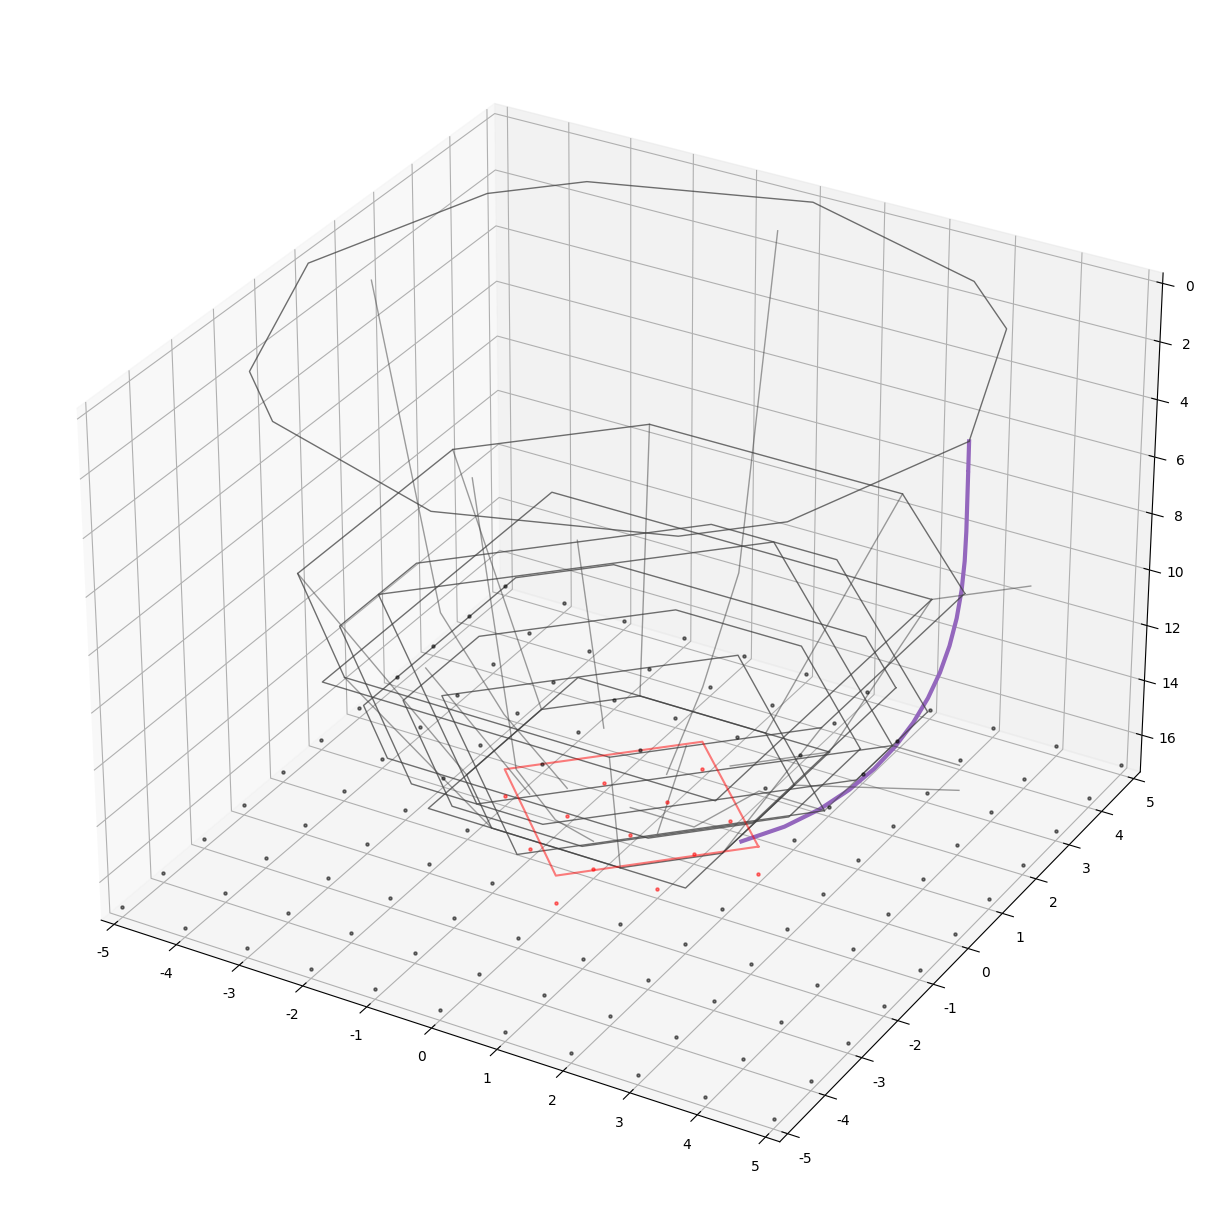

In [33]:
# fig, ax = draw_path(lattice, stone)
time_resolution = 1
stone = Stone(right_most_shell, at_rest=True, angular_momentum_per_unit_mass=0)
specific_path_finder(stone, time_resolution=time_resolution)

start = time.perf_counter_ns()
rings, curves, stone_path = set_time_intersection_with_lattice_data(lattice, stone)
data_elapsed = time.perf_counter_ns() - start
fig, ax = draw_path_3D_with_data(rings, curves, path=stone_path)
elapsed = time.perf_counter_ns() - start
print("draw_path_3D", f'Total: {elapsed*(10**-9)}', f'{data_elapsed=}')

In [34]:
import matplotlib.animation as animation

do_animation = False

if do_animation:
    time_resolution = 1
    stone = Stone(
        starting_coordinate=right_most_shell,
        at_rest=True,
        angular_momentum_per_unit_mass=2
    )
    specific_path_finder(stone, time_resolution=time_resolution)

    start = time.perf_counter_ns()
    rings, curves, stone_path = set_time_intersection_with_lattice_data(lattice, stone)
    data_elapsed = time.perf_counter_ns() - start
    fig, ax = draw_path_3D_with_data(rings, curves, path=stone_path)
    elapsed = time.perf_counter_ns() - start
    print("draw_path_3D", f'Total: {elapsed*(10**-9)}', f'{data_elapsed=}')

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=360)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_stone_rain_some_angular_momentum_shell_observer_reversed_time.gif', writer=writer, dpi=100)